## 3.5 图像分类数据集(Fashion-MNIST)

`torchvision`包，是服务于PyTorch深度学习框架的，主要用来构建计算机视觉模型。`torchvision`主要由以下几部分构成：

1. `torchvision.datasets`：一些加载数据的函数及常用的数据集接口
2. `torchvision.models`：包含常用的模型结构(含预训练模型)，例如AlexNet、VGG、ResNet等
3. `torchvision.transforms`：常用的图片变换，例如裁剪、旋转等
4. `torchvision.utils`：其他的一些有用的方法

In [1]:
import time
import sys
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

通过`torchvision`的`torchvision.datasets`来下载数据集，通过参数`train`来指定获取训练数据集或测试数据集。

指定参数`transform = transforms.ToTensor`使所有数据转换为`Tensor`，如果不进行转换则返回的是PIL图片。`transforms.ToTensor()`将尺寸为(H×W×C)且数据位于[0,255]的PIL图片或者数据类型为`np.uint8`的NumPy数组转换为尺寸为(C×H×W)且数据类型为`torch.float32`且位于[0.00.1.0]的`Tensor`。

> 注意：由于像素值为0到255的整数，所以刚好是uint8所能表示的范围，包括`transforms.ToTensor()`在内的一些关于图片的函数就默认输入的是uint8型，若不是，可能不会报错但可能得不到想要的结果。所以，如果像素值(0-255整数)表示图片数据，那么一律将其类型设置成uint8，避免不必要的bug。

In [2]:
mnist_train = torchvision.datasets.FashionMNIST(root='./Datasets/FashionMNIST', train=True, download=True, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.FashionMNIST(root='./Datasets/FashionMNIST', train=False, download=True, transform=transforms.ToTensor())

1.9%

100.0%


Extracting ./Datasets/FashionMNIST\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./Datasets/FashionMNIST\FashionMNIST\raw



100.0%

Extracting ./Datasets/FashionMNIST\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./Datasets/FashionMNIST\FashionMNIST\raw




14.8%

100.0%


Extracting ./Datasets/FashionMNIST\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./Datasets/FashionMNIST\FashionMNIST\raw



100.0%

Extracting ./Datasets/FashionMNIST\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./Datasets/FashionMNIST\FashionMNIST\raw



In [3]:
print(type(mnist_train))
print(len(mnist_train), len(mnist_test))

<class 'torchvision.datasets.mnist.FashionMNIST'>
60000 10000


In [4]:
# 通过下标访问任意一个样本
feature, label = mnist_train[0]
print(feature.shape, label)     # Channel Height Width

torch.Size([1, 28, 28]) 9


In [5]:
# 将数值标签转换成相应的文本标签
def get_fashion_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [6]:
# 在一行里面画出多张图像和对应标签的函数。
def show_fashion_mnist(images, labels):
    _, figs = plt.subplots(1, len(images), figsize=(12, 12))
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.view((28, 28)).numpy())
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    plt.show()

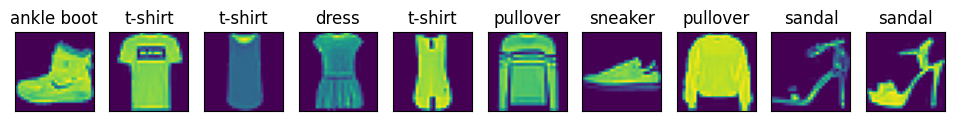

In [7]:
# 看一下训练数据集中前10个样本的图像内容和文本标签
X, y = [], []
for i in range(10):
    X.append(mnist_train[i][0])
    y.append(mnist_train[i][1])
show_fashion_mnist(X, get_fashion_labels(y))

### 3.5.2 读取小批量

`mnist_train`是`torch.utils.data.Dataset`的子类，所以我们可以将其传入`torch.utils.data.DataLoader`来创建一个读取小批量数据样本的DataLoader实例。

在实践中，数据读取经常是训练的性能瓶颈，特别当模型较简单或者计算硬件性能较高时。Pytorch的`DataLoader`中一个很方便的功能是允许使用多进程来加速数据读取，通过参数`num_workers`来设置4个进程读取数据。

In [8]:
batch_size= 256
if sys.platform.startswith('win'):
    num_workers = 0     # 表示不用额外的进程来加速读取数据
else:
    num_workers = 4

train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=num_workers)

In [9]:
start = time.time()
for X, y in train_iter:
    continue
print('%.2f sec' % (time.time() - start))

6.01 sec
